In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv('house-votes-84.data')
df = df.replace('y', 1)
df = df.replace('n', 0)

df1 = df.iloc[:,1:]
sr1 = df1.replace('?', np.NaN).mean()

for col in df1.columns:
    temp = df1.loc[:, col].replace('?', sr1[col])
    df1.loc[:, col] = df1.loc[:, col].replace('?', sr1[col])

In [27]:
from sklearn.model_selection import train_test_split

X = df1
y = df['republican']
y = y.apply(lambda x: 1 if x=='republican' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4444)

In [29]:
# knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_accu = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_accu.append((k, accuracy_score(y_test, knn.predict(X_test))))

accuracy=0.900763358779
precision=0.882352941176
recall=0.865384615385
f1=0.873786407767


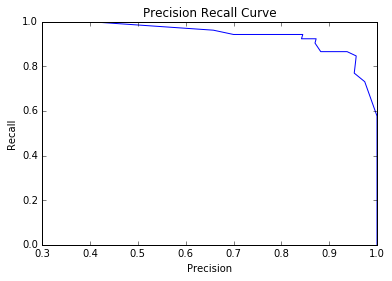

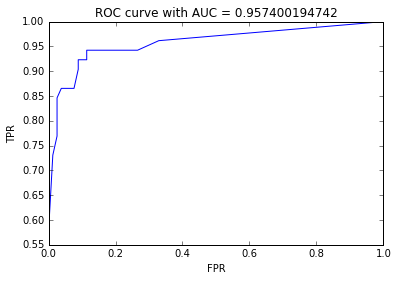

In [78]:
# ex6.1 and ex6.2 for knn
%matplotlib inline
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('accuracy='+ str(accuracy_score(y_test, knn.predict(X_test))))
print('precision='+ str(precision_score(y_test, knn.predict(X_test))))
print('recall='+ str(recall_score(y_test, knn.predict(X_test))))
print('f1='+ str(f1_score(y_test, knn.predict(X_test))))

pred_proba = knn.predict_proba(X_test)
precision, recall, threshold = precision_recall_curve(y_test, pred_proba[:, 1])
fig, ax = plt.subplots(1, 1)
ax.plot(precision, recall)
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision Recall Curve')

pred_proba = knn.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
fig, ax = plt.subplots(1, 1)
ax.plot(fpr, tpr)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.set_title('ROC curve with AUC = '+str(auc(fpr, tpr, reorder=True)))

In [81]:
# logreg
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_accuracy = accuracy_score(y_test, logreg.predict(X_test))
logreg_accuracy

0.96183206106870234

accuracy=0.961832061069
precision=0.979591836735
recall=0.923076923077
f1=0.950495049505


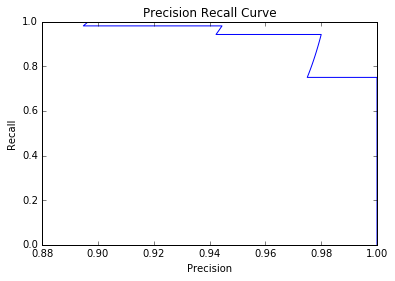

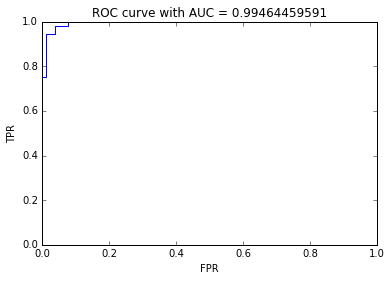

In [82]:
# ex6.1 and ex6.2 for logreg

%matplotlib inline
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('accuracy='+ str(accuracy_score(y_test, logreg.predict(X_test))))
print('precision='+ str(precision_score(y_test, logreg.predict(X_test))))
print('recall='+ str(recall_score(y_test, logreg.predict(X_test))))
print('f1='+ str(f1_score(y_test, logreg.predict(X_test))))

pred_proba = logreg.predict_proba(X_test)
precision, recall, threshold = precision_recall_curve(y_test, pred_proba[:, 1])
fig, ax = plt.subplots(1, 1)
ax.plot(precision, recall)
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision Recall Curve')

pred_proba = logreg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
fig, ax = plt.subplots(1, 1)
ax.plot(fpr, tpr)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.set_title('ROC curve with AUC = '+str(auc(fpr, tpr, reorder=True)))

In [79]:
# Gaussian

from sklearn.naive_bayes import GaussianNB
gau = GaussianNB()
gau.fit(X_train, y_train)
gau_accuracy = accuracy_score(y_test, gau.predict(X_test))
gau_accuracy

0.90839694656488545

accuracy=0.908396946565
precision=0.916666666667
recall=0.846153846154
f1=0.88


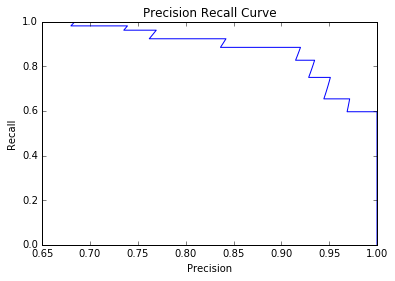

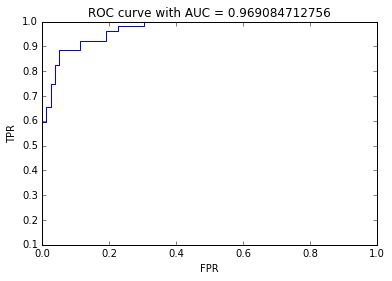

In [83]:
# ex6.1 and ex6.2 for GaussianNB

%matplotlib inline
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('accuracy='+ str(accuracy_score(y_test, gau.predict(X_test))))
print('precision='+ str(precision_score(y_test, gau.predict(X_test))))
print('recall='+ str(recall_score(y_test, gau.predict(X_test))))
print('f1='+ str(f1_score(y_test, gau.predict(X_test))))

pred_proba = gau.predict_proba(X_test)
precision, recall, threshold = precision_recall_curve(y_test, pred_proba[:, 1])
fig, ax = plt.subplots(1, 1)
ax.plot(precision, recall)
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision Recall Curve')

pred_proba = gau.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
fig, ax = plt.subplots(1, 1)
ax.plot(fpr, tpr)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.set_title('ROC curve with AUC = '+str(auc(fpr, tpr, reorder=True)))

In [102]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train, y_train)
svc_accuracy = accuracy_score(y_test, svc.predict(X_test))
svc_accuracy

0.95419847328244278

accuracy=0.954198473282
precision=0.942307692308
recall=0.942307692308
f1=0.942307692308


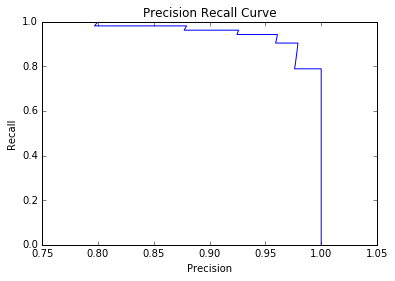

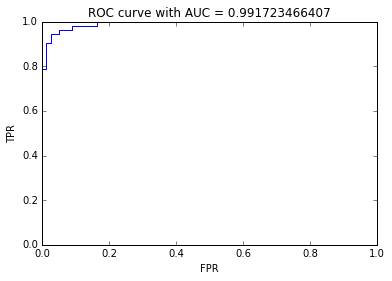

In [104]:
# ex6.1 and ex6.2 for SVC

%matplotlib inline
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('accuracy='+ str(accuracy_score(y_test, svc.predict(X_test))))
print('precision='+ str(precision_score(y_test, svc.predict(X_test))))
print('recall='+ str(recall_score(y_test, svc.predict(X_test))))
print('f1='+ str(f1_score(y_test, svc.predict(X_test))))

pred_proba = svc.predict_proba(X_test)
precision, recall, threshold = precision_recall_curve(y_test, pred_proba[:, 1])
fig, ax = plt.subplots(1, 1)
ax.plot(precision, recall)
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision Recall Curve')

pred_proba = svc.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
fig, ax = plt.subplots(1, 1)
ax.plot(fpr, tpr)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.set_title('ROC curve with AUC = '+str(auc(fpr, tpr, reorder=True)))

In [93]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_accuracy = accuracy_score(y_test, dt.predict(X_test))
dt_accuracy

0.92366412213740456

accuracy=0.923664122137
precision=0.92
recall=0.884615384615
f1=0.901960784314


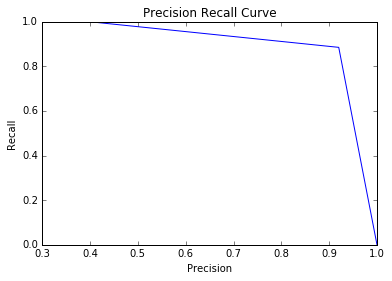

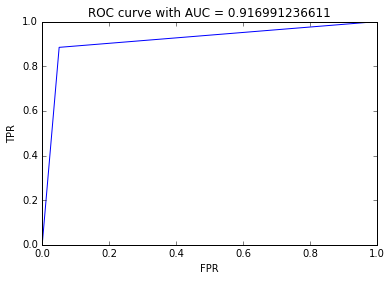

In [94]:
# ex6.1 and ex6.2 for DecisionTree

%matplotlib inline
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('accuracy='+ str(accuracy_score(y_test, dt.predict(X_test))))
print('precision='+ str(precision_score(y_test, dt.predict(X_test))))
print('recall='+ str(recall_score(y_test, dt.predict(X_test))))
print('f1='+ str(f1_score(y_test, dt.predict(X_test))))

pred_proba = dt.predict_proba(X_test)
precision, recall, threshold = precision_recall_curve(y_test, pred_proba[:, 1])
fig, ax = plt.subplots(1, 1)
ax.plot(precision, recall)
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision Recall Curve')

pred_proba = dt.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
fig, ax = plt.subplots(1, 1)
ax.plot(fpr, tpr)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.set_title('ROC curve with AUC = '+str(auc(fpr, tpr, reorder=True)))

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rf.predict(X_test))
rf_accuracy

0.95419847328244278

accuracy=0.954198473282
precision=0.96
recall=0.923076923077
f1=0.941176470588


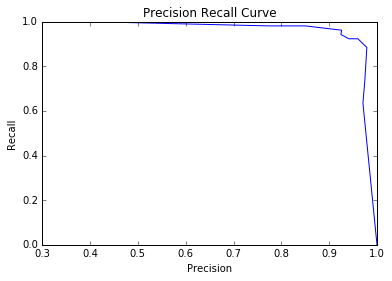

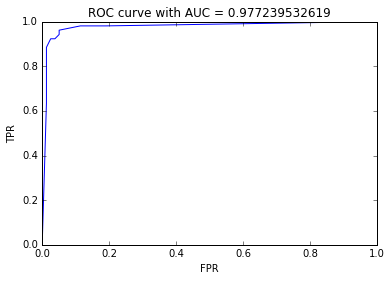

In [96]:
# ex6.1 and ex6.2 for RandomForest

%matplotlib inline
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('accuracy='+ str(accuracy_score(y_test, rf.predict(X_test))))
print('precision='+ str(precision_score(y_test, rf.predict(X_test))))
print('recall='+ str(recall_score(y_test, rf.predict(X_test))))
print('f1='+ str(f1_score(y_test, rf.predict(X_test))))

pred_proba = rf.predict_proba(X_test)
precision, recall, threshold = precision_recall_curve(y_test, pred_proba[:, 1])
fig, ax = plt.subplots(1, 1)
ax.plot(precision, recall)
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision Recall Curve')

pred_proba = rf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
fig, ax = plt.subplots(1, 1)
ax.plot(fpr, tpr)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.set_title('ROC curve with AUC = '+str(auc(fpr, tpr, reorder=True)))

In [105]:
# ex5.12
dfh = pd.read_csv('haberman.data')
dfh.columns=['age','op','node','status']

In [106]:
dfh.head()

,age,op,node,status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [119]:
y_test

258    2
112    1
105    1
128    1
38     1
88     2
257    2
6      2
29     1
303    2
246    1
297    1
98     1
168    2
243    1
213    1
51     1
82     1
278    1
149    1
49     1
249    1
250    1
110    1
224    1
139    1
241    1
147    1
28     1
211    1
      ..
204    1
77     1
81     2
72     2
30     1
71     1
68     1
276    1
285    2
191    1
44     2
93     1
132    1
284    2
300    1
271    1
26     1
178    1
216    1
166    2
217    1
116    1
108    2
13     1
76     1
156    2
57     1
64     2
279    1
67     1
Name: status, dtype: int64

In [123]:
# logreg
X = dfh.iloc[:,[1,2,3]]
y = dfh.iloc[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4444)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_accuracy = accuracy_score(y_test, logreg.predict(X_test))
logreg_accuracy

1.0

accuracy=1.0
precision=1.0
recall=1.0
f1=1.0


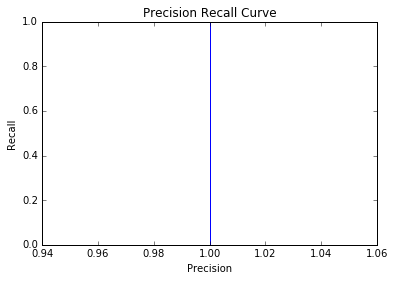

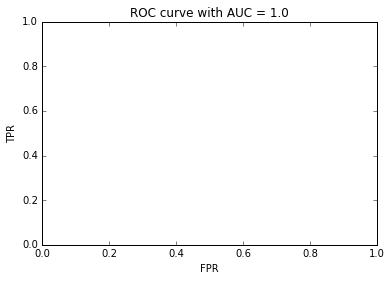

In [126]:
# ex6.1 and ex6.2 for logreg

%matplotlib inline
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('accuracy='+ str(accuracy_score(y_test, logreg.predict(X_test))))
print('precision='+ str(precision_score(y_test, logreg.predict(X_test))))
print('recall='+ str(recall_score(y_test, logreg.predict(X_test))))
print('f1='+ str(f1_score(y_test, logreg.predict(X_test))))

pred_proba = logreg.predict_proba(X_test)
precision, recall, threshold = precision_recall_curve(y_test, pred_proba[:, 1], pos_label=2)
fig, ax = plt.subplots(1, 1)
ax.plot(precision, recall)
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision Recall Curve')

pred_proba = logreg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1], pos_label=2)
fig, ax = plt.subplots(1, 1)
ax.plot(fpr, tpr)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.set_title('ROC curve with AUC = '+str(auc(fpr, tpr, reorder=True)))